In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df 




#### a.Read the Data

In [2]:
data=pd.read_csv('wine.csv')
data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

#### b.Performing EDA

In [3]:
data.shape

(178, 14)

In [4]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [7]:
data[data.duplicated()]

Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []

In [8]:
data.isnull()

Type  Alcohol  Malic    Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    False    False  False  False       False      False    False       False   
1    False    False  False  False       False      False    False       False   
2    False    False  False  False       False      False    False       False   
3    False    False  False  False       False      False    False       False   
4    False    False  False  False       False      False    False       False   
..     ...      ...    ...    ...         ...        ...      ...         ...   
173  False    False  False  False       False      False    False       False   
174  False    False  False  False       False      False    False       False   
175  False    False  False  False       False      False    False       False   
176  False    False  False  False       False      False    False       False   
177  False    False  False  False       False      False    False       False   

     Nonflavanoids  Proanthocyanins  Color    Hue  Dilution  Proline  
0            False            False  False  False     False    False  
1            False            False  False  False     False    False  
2            False            False  False  False     False    False  
3            False            False  False  False     False    False  
4            False            False  False  False     False    False  
..             ...              ...    ...    ...       ...      ...  
173          False            False  False  False     False    False  
174          False            False  False  False     False    False  
175          False            False  False  False     False    False  
176          False            False  False  False     False    False  
177          False            False  False  False     False    False  

[178 rows x 14 columns]

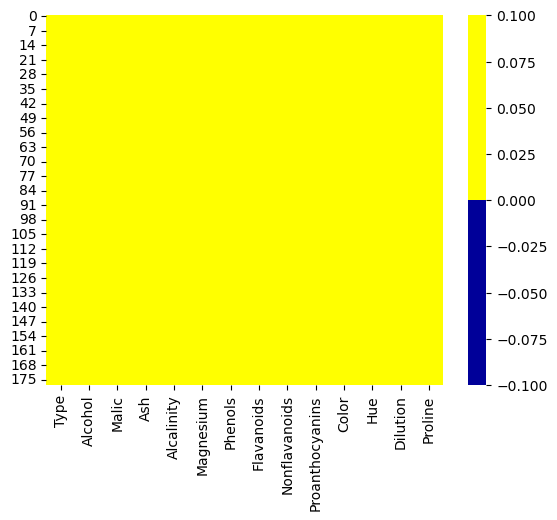

In [9]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(data.isnull(), cmap=pal)
plt.show()

##### c.Performing Corelation

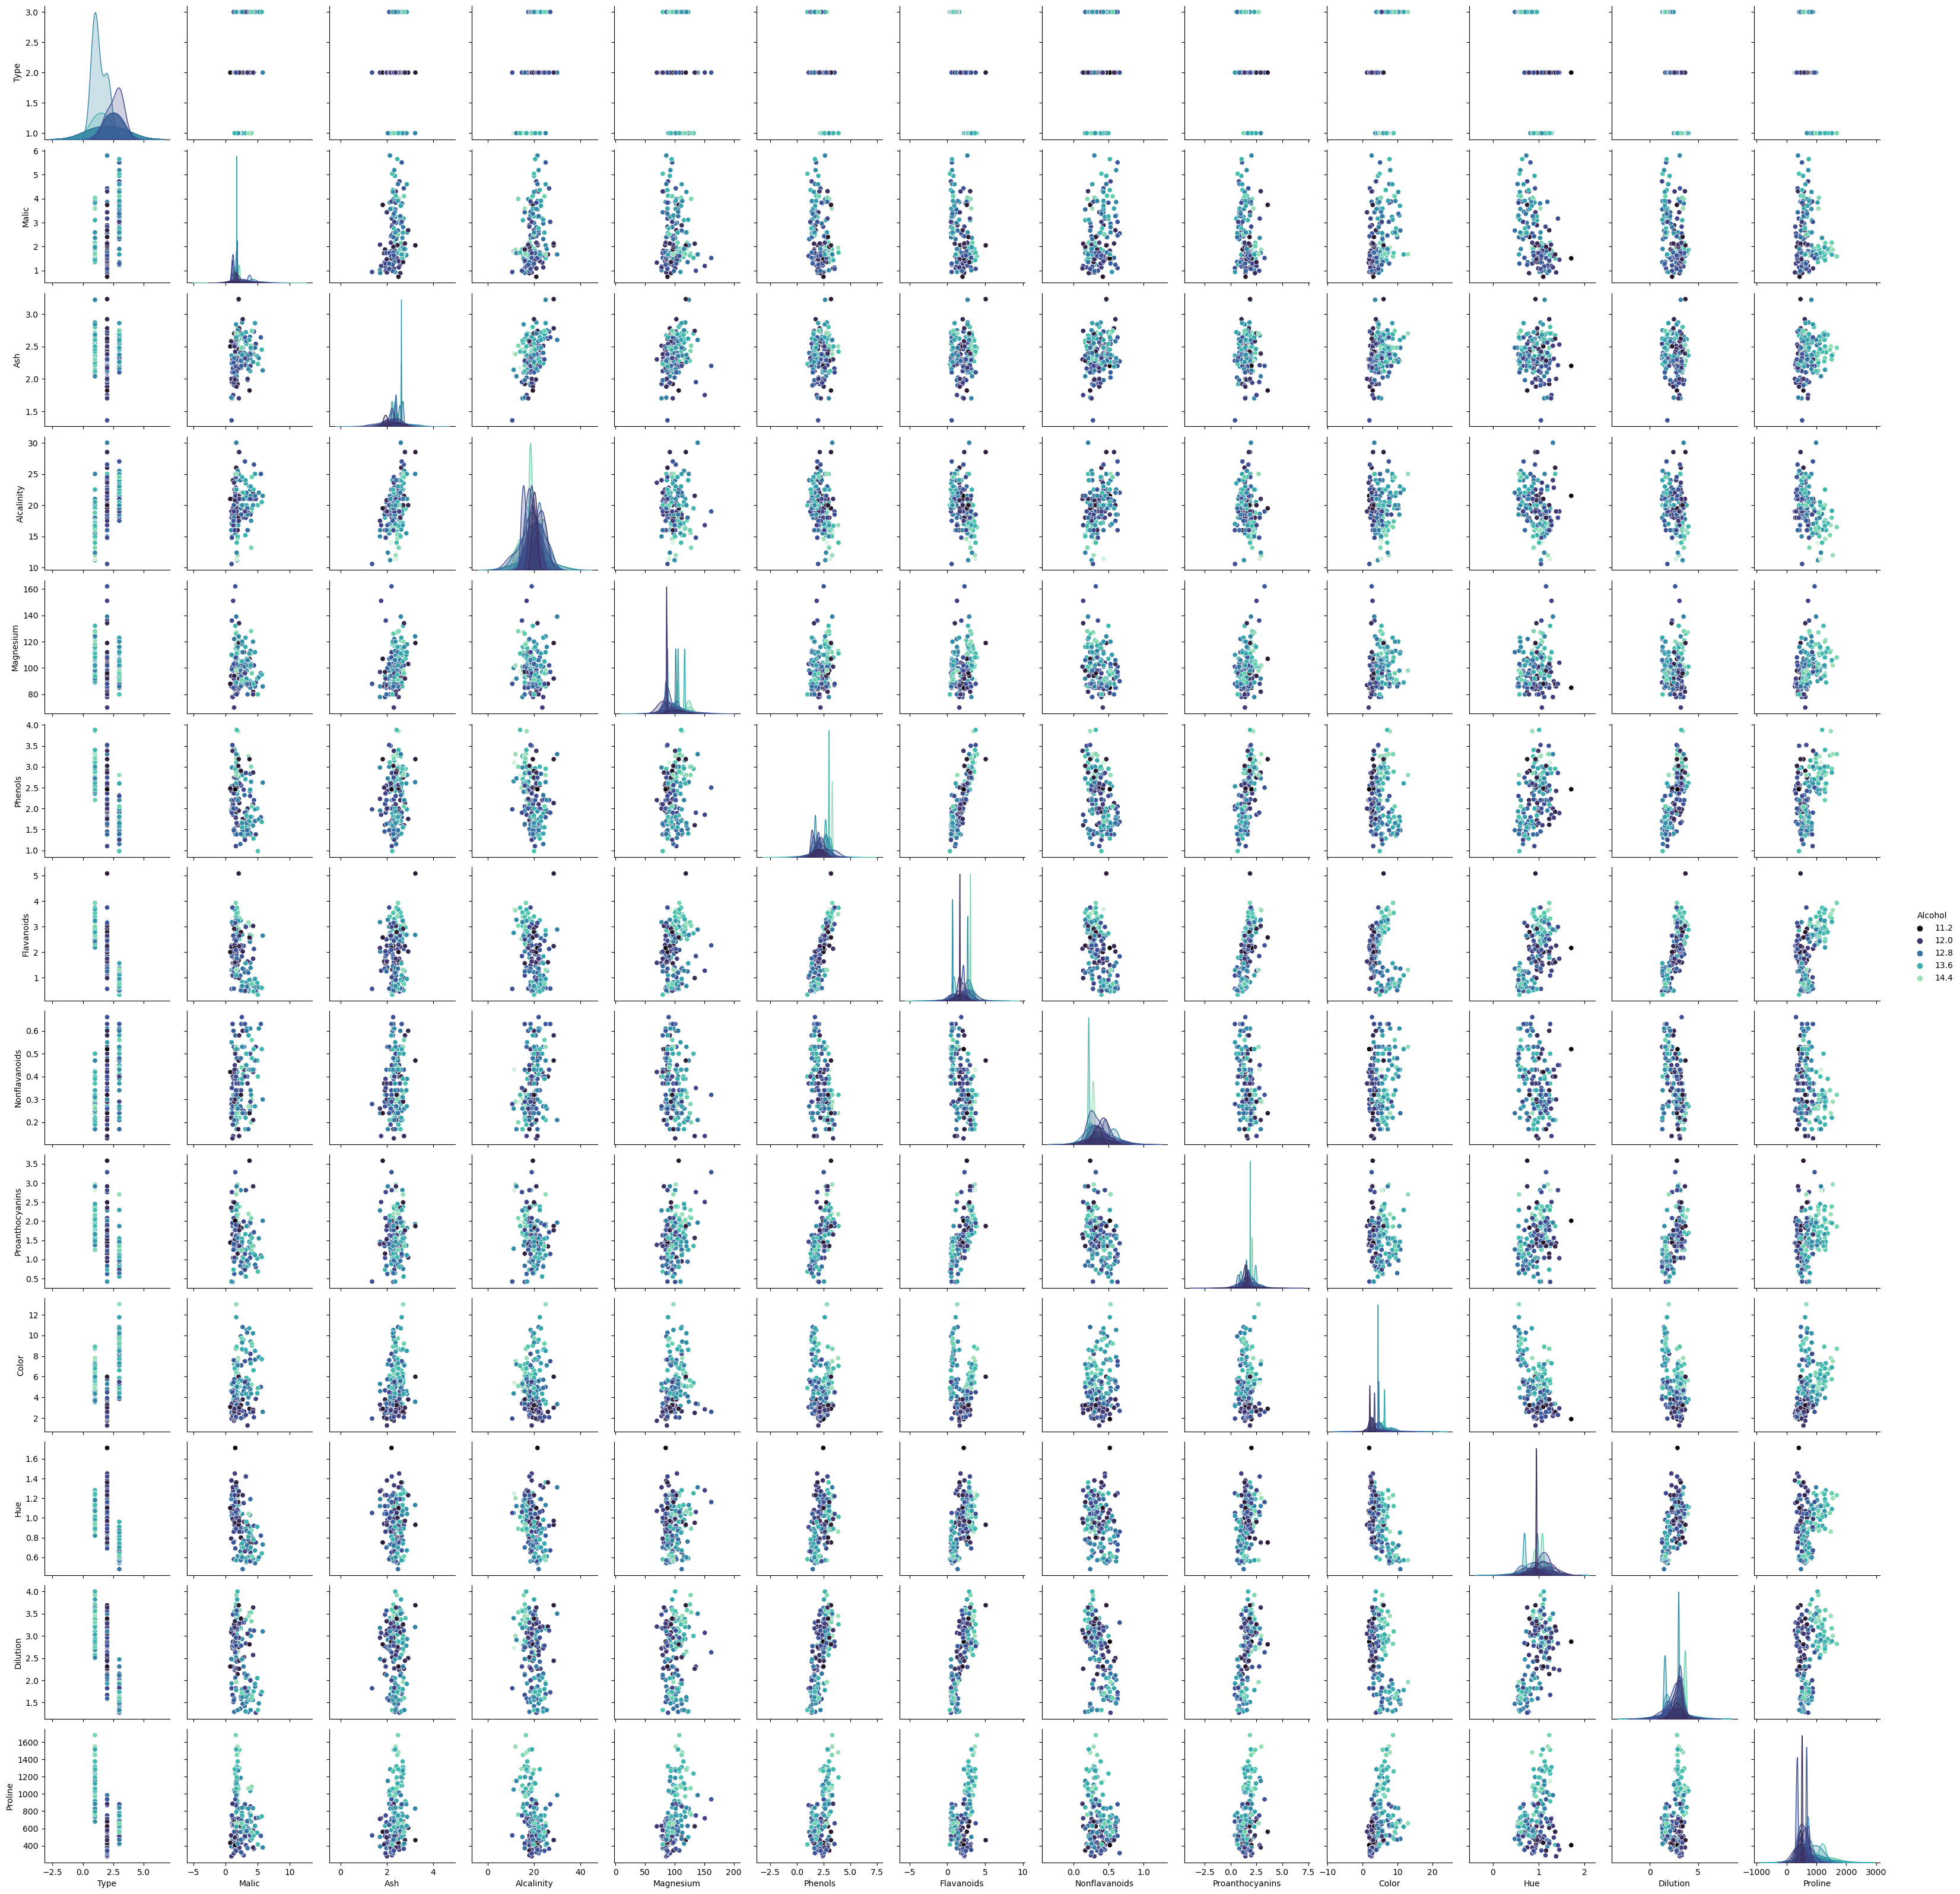

In [10]:
sns.pairplot(data,palette='mako', hue='Alcohol')
plt.show()

In [11]:
data.corr()

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

[]

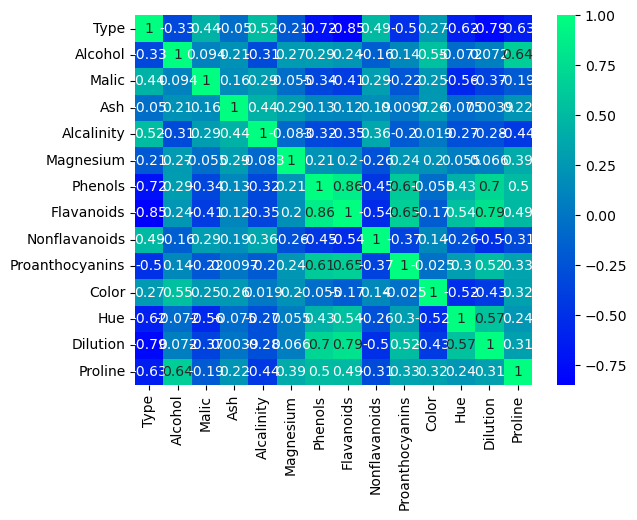

In [12]:
sns.heatmap(data.corr(), cmap='winter', annot=True)
plt.plot()

#### d.Checking Outliers/Influencers

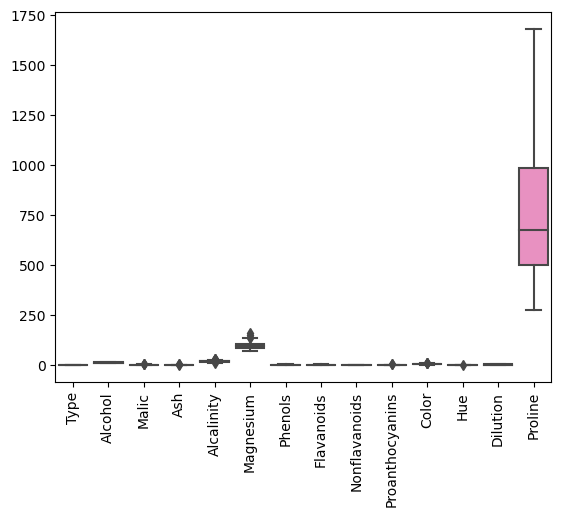

In [78]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [13]:
data['Type'].unique()

array([1, 2, 3], dtype=int64)

In [14]:
data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

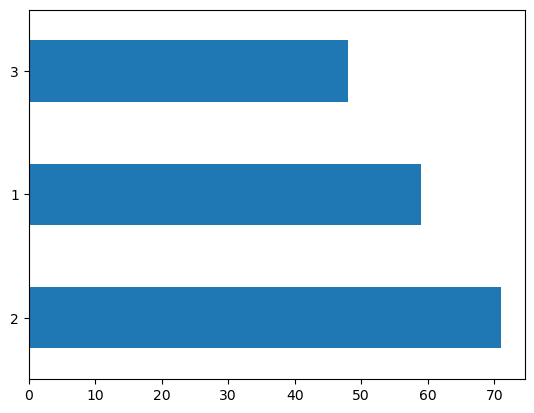

In [15]:
data['Type'].value_counts().plot.barh()
plt.show()

#### f.Scaling the DATA

In [16]:
X=data.iloc[:,1:]

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
scaled_df=scaler.fit_transform(X)
scaled_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### g.Performing Principal COmponent Analysis

In [20]:
from sklearn.decomposition import PCA

In [21]:
model=PCA()

In [22]:
df=model.fit_transform(scaled_df)
df

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [23]:
wine=pd.DataFrame(data=df,columns=['PCA_comp1','PCA_comp2','PCA_comp3','PCA_comp4','PCA_comp5','PCA_comp6','PCA_comp7','PCA_comp8','PCA_comp9','PCA_comp10','PCA_comp11','PCA_comp12','PCA_comp13'])
wine

PCA_comp1  PCA_comp2  PCA_comp3  PCA_comp4  PCA_comp5  PCA_comp6  \
0     3.316751  -1.443463  -0.165739  -0.215631   0.693043  -0.223880   
1     2.209465   0.333393  -2.026457  -0.291358  -0.257655  -0.927120   
2     2.516740  -1.031151   0.982819   0.724902  -0.251033   0.549276   
3     3.757066  -2.756372  -0.176192   0.567983  -0.311842   0.114431   
4     1.008908  -0.869831   2.026688  -0.409766   0.298458  -0.406520   
..         ...        ...        ...        ...        ...        ...   
173  -3.370524  -2.216289  -0.342570   1.058527  -0.574164  -1.108788   
174  -2.601956  -1.757229   0.207581   0.349496   0.255063  -0.026465   
175  -2.677839  -2.760899  -0.940942   0.312035   1.271355   0.273068   
176  -2.387017  -2.297347  -0.550696  -0.688285   0.813955   1.178783   
177  -3.208758  -2.768920   1.013914   0.596903  -0.895193   0.296092   

     PCA_comp7  PCA_comp8  PCA_comp9  PCA_comp10  PCA_comp11  PCA_comp12  \
0     0.596427   0.065139   0.641443    1.020956   -0.451563    0.540810   
1     0.053776   1.024416  -0.308847    0.159701   -0.142657    0.388238   
2     0.424205  -0.344216  -1.177834    0.113361   -0.286673    0.000584   
3    -0.383337   0.643593   0.052544    0.239413    0.759584   -0.242020   
4     0.444074   0.416700   0.326819   -0.078366   -0.525945   -0.216664   
..         ...        ...        ...         ...         ...         ...   
173   0.958416  -0.146097  -0.022498   -0.304117    0.139228    0.170786   
174   0.146894  -0.552427  -0.097969   -0.206061    0.258198   -0.279431   
175   0.679235   0.047024   0.001222   -0.247997    0.512492    0.698766   
176   0.633975   0.390829   0.057448    0.491490    0.299822    0.339821   
177   0.005741  -0.292914   0.741660   -0.117969   -0.229964   -0.188788   

     PCA_comp13  
0     -0.066239  
1      0.003637  
2      0.021717  
3     -0.369484  
4     -0.079364  
..          ...  
173   -0.114427  
174   -0.187371  
175    0.072078  
176   -0.021866  
177   -0.323965  

[178 rows x 13 columns]

#### h.Performing Corelation and detecting Outliers in PCA data

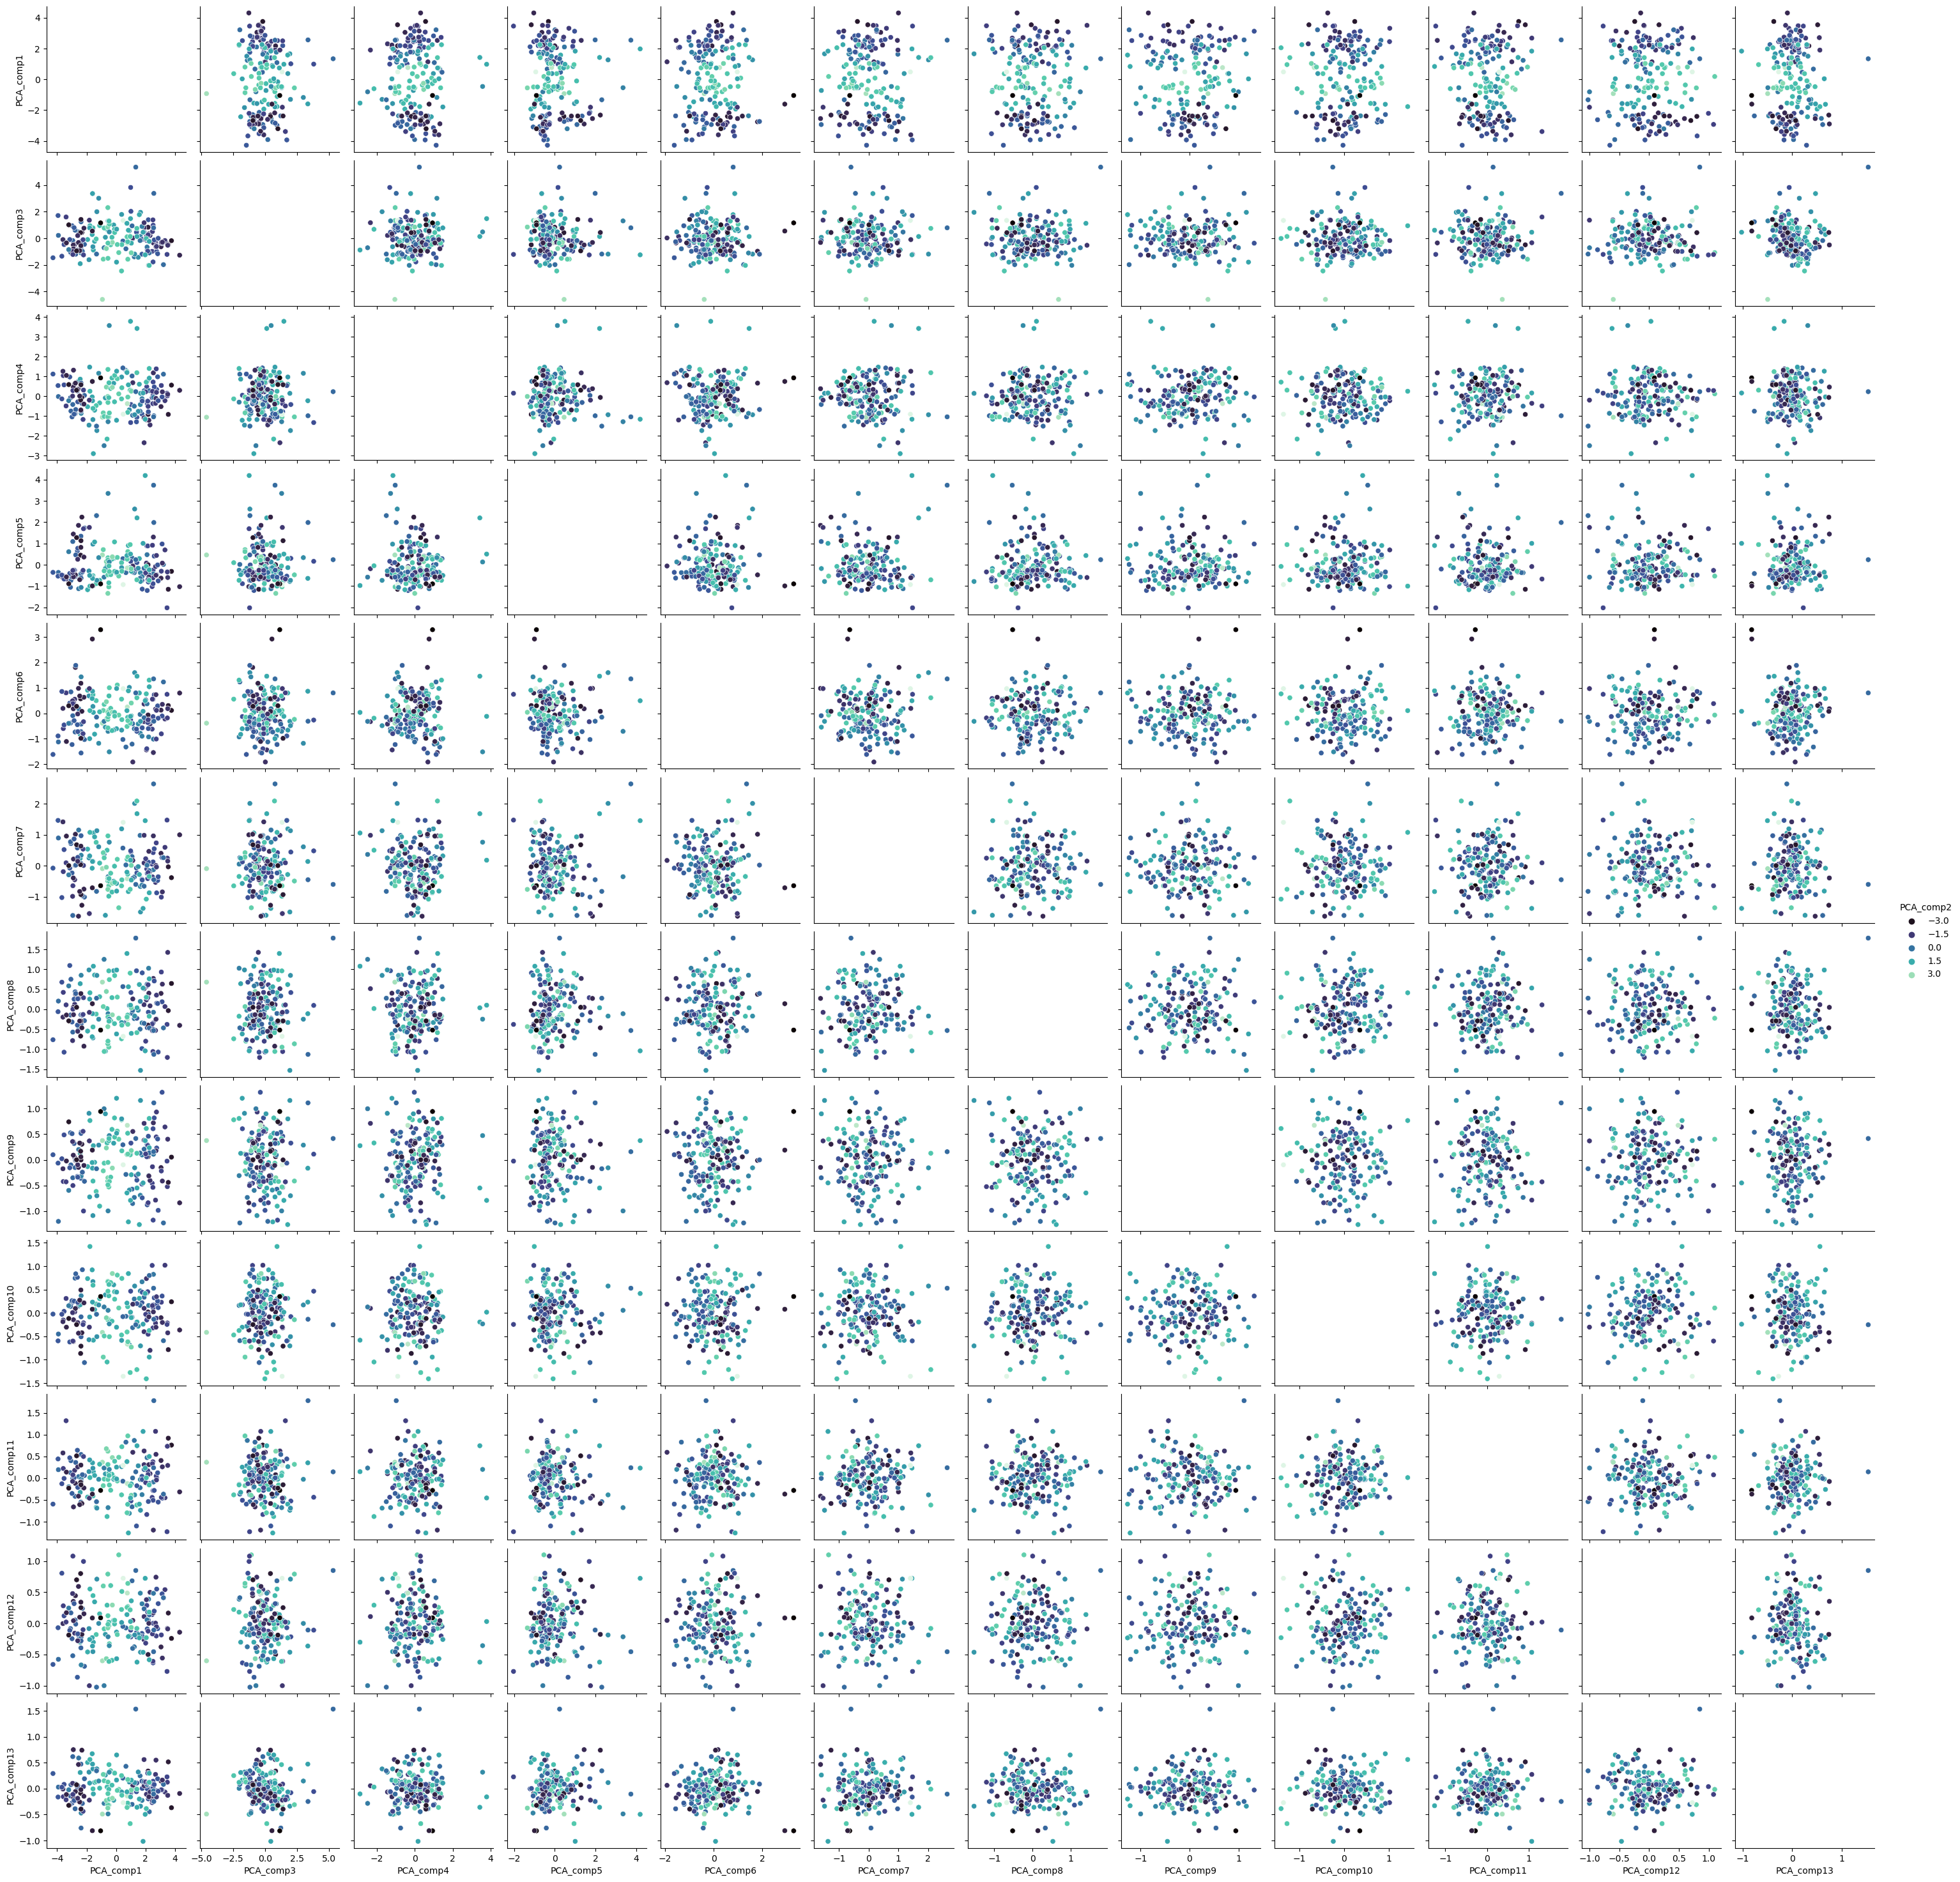

In [83]:
sns.pairplot(wine,palette='mako', hue='PCA_comp2')
plt.show()

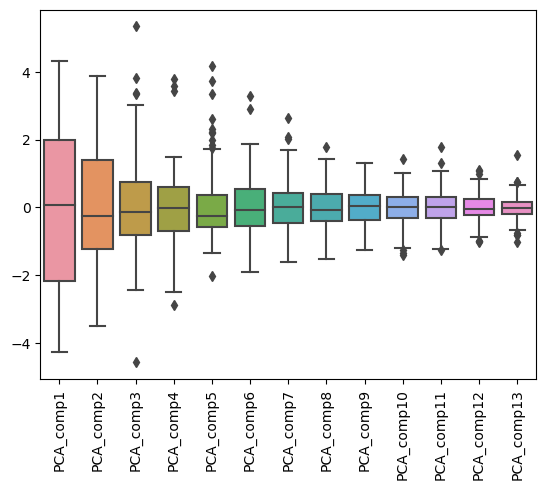

In [77]:
sns.boxplot(wine)
plt.xticks(rotation=90)
plt.show()

In [80]:
explained_variance=model.explained_variance_ratio_

In [25]:
variance1=np.cumsum(variance)
variance1

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [79]:
component_numbers=model.components_  #eigen vector which has to be multiplied with principal component.

Taking the three principal components from the above data

In [27]:
pca_comp=wine.iloc[:,0:3]
pca_comp

PCA_comp1  PCA_comp2  PCA_comp3
0     3.316751  -1.443463  -0.165739
1     2.209465   0.333393  -2.026457
2     2.516740  -1.031151   0.982819
3     3.757066  -2.756372  -0.176192
4     1.008908  -0.869831   2.026688
..         ...        ...        ...
173  -3.370524  -2.216289  -0.342570
174  -2.601956  -1.757229   0.207581
175  -2.677839  -2.760899  -0.940942
176  -2.387017  -2.297347  -0.550696
177  -3.208758  -2.768920   1.013914

[178 rows x 3 columns]

In [71]:
x = pca_comp.iloc[:, 0]
y = pca_comp.iloc[:, 1]
z = pca_comp.iloc[:, 2]

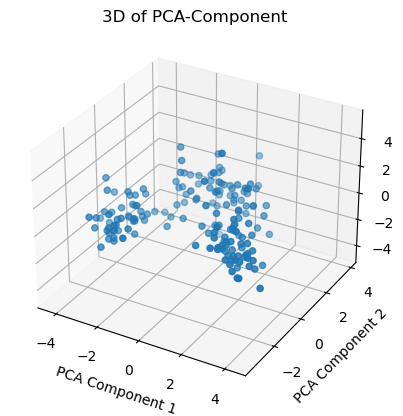

In [74]:
ax = plt.figure().add_subplot(111, projection='3d') #111,1-row;1-column;1-subplot
ax.scatter(x,y,z)
ax.set_title('3D of PCA-Component')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

### Perform KMean Method:

Scaling the model

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler1=MinMaxScaler()

In [32]:
scaled_d1=scaler1.fit_transform(pca_comp)
#scaled_d1

KMean Method

In [33]:
from sklearn.cluster import KMeans

In [34]:
model1=KMeans(n_clusters=3,random_state=42)

In [35]:
model1.fit(scaled_d1)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [36]:
wcss_w=[]
for i in range(1,11):
    model1=KMeans(n_clusters=i,random_state=42)
    model1.fit(pca_comp)
    wcss_w.append(model1.inertia_)
wcss_w    

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[1539.5034801883069,
 886.1611364823491,
 512.9995067661513,
 429.61967982630256,
 370.91800660617105,
 325.031134639602,
 287.72056590139533,
 266.62295655327557,
 241.44497427840497,
 217.67945500942471]

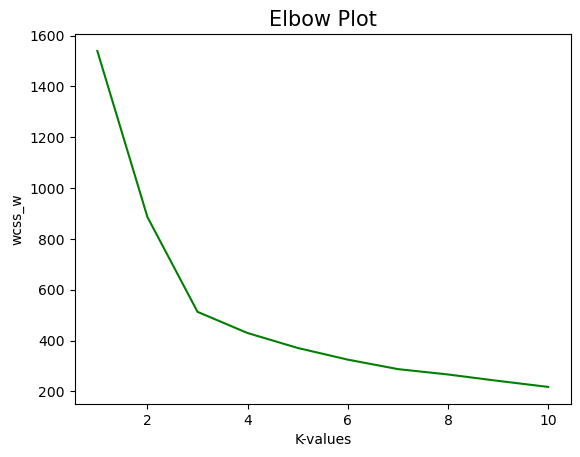

In [37]:
plt.plot(range(1,11),wcss_w,color='green')
plt.title("Elbow Plot",fontsize=15)
plt.xlabel('K-values')
plt.ylabel('wcss_w')
plt.show()

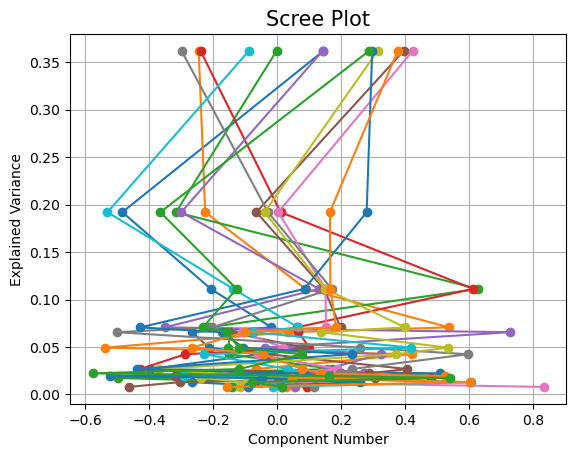

In [81]:
plt.plot(component_numbers, explained_variance, marker='o', linestyle='-')
plt.title("Scree Plot", fontsize=15)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [38]:
#Build the final model with k=3

In [39]:
model_fin1=KMeans(n_clusters=3,random_state=42)

In [40]:
model_fin1.fit(scaled_d1)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [41]:
model_fin1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [42]:
pca_comp['KMean_label']=model_fin1.labels_
pca_comp

C:\Users\sreen\AppData\Local\Temp\ipykernel_18452\1019098403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_comp['KMean_label']=model_fin1.labels_


PCA_comp1  PCA_comp2  PCA_comp3  KMean_label
0     3.316751  -1.443463  -0.165739            2
1     2.209465   0.333393  -2.026457            2
2     2.516740  -1.031151   0.982819            2
3     3.757066  -2.756372  -0.176192            2
4     1.008908  -0.869831   2.026688            2
..         ...        ...        ...          ...
173  -3.370524  -2.216289  -0.342570            1
174  -2.601956  -1.757229   0.207581            1
175  -2.677839  -2.760899  -0.940942            1
176  -2.387017  -2.297347  -0.550696            1
177  -3.208758  -2.768920   1.013914            1

[178 rows x 4 columns]

In [43]:
KM_grp=pca_comp.groupby('KMean_label')

In [44]:
for x,y in KM_grp:
    print(x)

0
1
2


In [45]:
for x,y in KM_grp:
    print(y)
    print(50*'-')

     PCA_comp1  PCA_comp2  PCA_comp3  KMean_label
38    1.502195   0.769432  -1.426177            0
59   -0.928582   3.073486  -4.585064            0
60   -1.542480   1.381444  -0.874683            0
61   -1.836250   0.829984  -1.605702            0
62    0.030607   1.262786  -1.784408            0
..         ...        ...        ...          ...
125  -0.096810   2.109998   0.434826            0
126   0.038487   1.266762   0.687578            0
127  -1.597159   1.208144   3.361176            0
128  -0.479565   1.938841   1.296508            0
129  -1.792833   1.150288   0.782800            0

[68 rows x 4 columns]
--------------------------------------------------
     PCA_comp1  PCA_comp2  PCA_comp3  KMean_label
83   -2.538977   0.087443   0.474251            1
130  -1.327102  -0.170389  -1.180013            1
131  -2.384501  -0.374583  -0.723823            1
132  -2.936940  -0.263862  -0.167640            1
133  -2.146811  -0.368255  -0.453301            1
134  -2.369869   0.459635 

In [46]:
X=pca_comp.iloc[:,0:3]
y=pca_comp.iloc[:,3]

In [47]:
from sklearn.manifold import TSNE

In [48]:
modelt=TSNE(n_components=2)

In [49]:
tsne_comps=modelt.fit_transform(X)

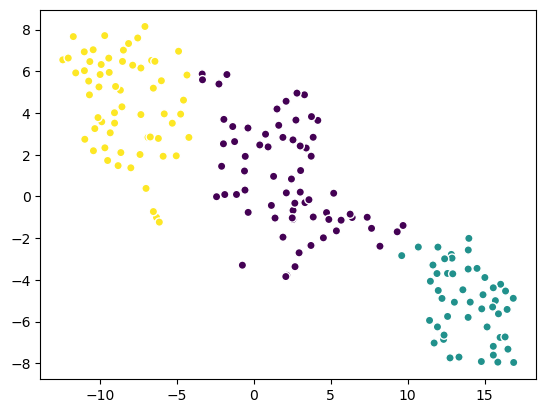

In [50]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolors='white')
plt.show()

### Perform HAC Method:

Scaling the model

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scalerss=StandardScaler()

In [53]:
scaled_d2=scalerss.fit_transform(pca_comp)

In [54]:
scaled_d2

array([[ 1.52895179e+00, -9.13478982e-01, -1.37825595e-01,
         1.22216756e+00],
       [ 1.01851648e+00,  2.10983913e-01, -1.68516534e+00,
         1.22216756e+00],
       [ 1.16016384e+00, -6.52552421e-01,  8.17294251e-01,
         1.22216756e+00],
       [ 1.73192758e+00, -1.74433875e+00, -1.46517953e-01,
         1.22216756e+00],
       [ 4.65085422e-01, -5.50462585e-01,  1.68535731e+00,
         1.22216756e+00],
       [ 1.40610238e+00, -1.34313751e+00, -5.23394199e-01,
         1.22216756e+00],
       [ 1.12897840e+00, -7.43490601e-01, -8.12534459e-01,
         1.22216756e+00],
       [ 9.49356728e-01, -1.01821406e+00,  1.21645371e-01,
         1.22216756e+00],
       [ 1.15745981e+00, -5.80990809e-01, -1.47270585e+00,
         1.22216756e+00],
       [ 1.26936420e+00, -4.99586692e-01, -8.18482431e-01,
         1.22216756e+00],
       [ 1.60408482e+00, -8.24166841e-01, -3.51538969e-01,
         1.22216756e+00],
       [ 8.08903878e-01, -3.87282859e-01, -9.90312897e-01,
      

In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
model2=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [57]:
model2.fit(scaled_d2)

C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [58]:
model2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [59]:
pca_comp['HAC_labels']=model2.labels_
pca_comp

C:\Users\sreen\AppData\Local\Temp\ipykernel_18452\1935979407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_comp['HAC_labels']=model2.labels_


PCA_comp1  PCA_comp2  PCA_comp3  KMean_label  HAC_labels
0     3.316751  -1.443463  -0.165739            2           1
1     2.209465   0.333393  -2.026457            2           1
2     2.516740  -1.031151   0.982819            2           1
3     3.757066  -2.756372  -0.176192            2           1
4     1.008908  -0.869831   2.026688            2           1
..         ...        ...        ...          ...         ...
173  -3.370524  -2.216289  -0.342570            1           1
174  -2.601956  -1.757229   0.207581            1           1
175  -2.677839  -2.760899  -0.940942            1           1
176  -2.387017  -2.297347  -0.550696            1           1
177  -3.208758  -2.768920   1.013914            1           1

[178 rows x 5 columns]

In [60]:
HAC_grp=pca_comp.groupby('HAC_labels')

In [61]:
for x,y in HAC_grp:
    print(x)

0
1
2


In [62]:
for x,y in HAC_grp:
    print(y)
    print(50*'-')

     PCA_comp1  PCA_comp2  PCA_comp3  KMean_label  HAC_labels
38    1.502195   0.769432  -1.426177            0           0
59   -0.928582   3.073486  -4.585064            0           0
60   -1.542480   1.381444  -0.874683            0           0
61   -1.836250   0.829984  -1.605702            0           0
62    0.030607   1.262786  -1.784408            0           0
63    2.050262   1.925033  -0.007369            0           0
64   -0.609681   1.908059   0.679358            0           0
65    0.900228   0.763911   0.573361            0           0
66    2.248507   1.884592  -2.031840            0           0
67    0.183384   2.427146  -1.069746            0           0
68   -0.812805   0.220514  -0.707005            0           0
69    1.975620   1.403283  -1.238276            0           0
70   -1.572216   0.884983  -0.628998            0           0
72   -0.725372   1.063645   0.080332            0           0
74    1.832568   1.287878   0.458280            0           0
75   -0.

Plot the dendogram

In [63]:
from scipy.cluster import hierarchy

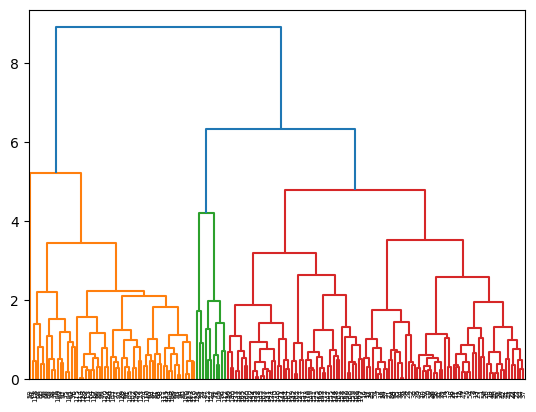

<Figure size 2000x1600 with 0 Axes>

In [64]:
hir=hierarchy.linkage(scaled_d2,method='complete')
den=hierarchy.dendrogram(hir)
plt.figure(figsize=(20,16))
plt.show()

In [65]:
y1=pca_comp.iloc[:,4]

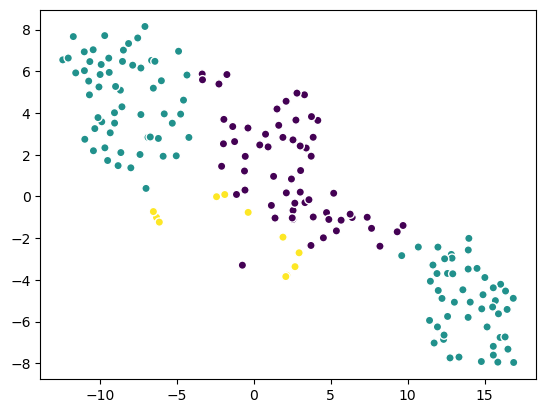

In [66]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y1,cmap='viridis',edgecolors='white')
plt.show()

#### Comparing the orginal types with KMeans and HAC Labels

In [67]:
pca_components=pd.DataFrame({'class':data['Type'],'KMeans_label':model_fin1.labels_,'HAC_label':model2.labels_})
pca_components

class  KMeans_label  HAC_label
0        1             2          1
1        1             2          1
2        1             2          1
3        1             2          1
4        1             2          1
..     ...           ...        ...
173      3             1          1
174      3             1          1
175      3             1          1
176      3             1          1
177      3             1          1

[178 rows x 3 columns]